In [1]:
!pip install seaborn

In [21]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv("train.csv", sep=",")
test_data = pd.read_csv("test.csv", sep=",")

In [2]:
def converte_binario(palavra):
    if palavra=='female':
        return 0
    elif palavra=='male':
        return 1

# Início da análise da base de dados

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data['Sex_bin'] = data['Sex'].apply(converte_binario)
data.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


Tratando os valores de idade missing.

In [22]:
data.fillna(data.mean(), inplace=True)
test_data.fillna(data.mean(), inplace=True)

Agora, será verificada a porcentagem de homens e mulheres que sobreviveream.

In [6]:
women_survived = data.loc[data.Sex == "female"]["Survived"]
women_rate = sum(women_survived) / len(women_survived)

print("Ao fim, sobreviveram {:.2f} % das mulheres.".format(women_rate * 100))

Ao fim, sobreviveram 74.20 % das mulheres.


In [7]:
men_survived = data.loc[data.Sex == "male"]["Survived"]
men_rate = sum(men_survived) / len(men_survived)

print("Ao fim, sobreviveram {:.2f} % dos homens.".format(men_rate * 100))

Ao fim, sobreviveram 18.89 % dos homens.


O código acima, mostra que o sexo do passageiro é um forte indicador de sobrevivência. Entretanto, não é seguro utilizar apenas uma tabela para realizar predições, sendo assim, utilizaremos outras tabelas além dessa no método Random Forest, afim de realizar as primeiras predições. 

In [23]:
def applyRandomForest(target, features):

    #Transforma dados categóricos em valores dummy 0's ou 1's
    variables = pd.get_dummies(data[features])
    variables_test = pd.get_dummies(test_data[features])

    #Inicializa o método random forest, que gerará 100 árvores de profundidade 5 e passa os parâmetros de entrada(variables) e seus
    #respectivos targets.
    model = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 1)
    model.fit(variables, target)

    #Computa as predições realizadas no set de teste
    predictions = model.predict(variables_test)

    #Gera o dataframe e o arquivo CSV com as predições

    output = pd.DataFrame({"PassengerId" : test_data.PassengerId, 'Survived': predictions})
    output.to_csv('my_submission.csv', index=False)
    print("Your submission was successfully saved!")

    print(predictions)

    
target = data["Survived"]

features = ["Pclass", "Sex", "Age"]

applyRandomForest(target, features)

Your submission was successfully saved!
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 0 1 1 1 0 1 0 0 0]


Abaixo teremos também o método de Logistic Regression, para caso seja necessário.

In [24]:
def applyLogisticRegression(target, features):

    #Transforma dados categóricos em valores dummy 0's ou 1's
    variables = pd.get_dummies(data[features])
    variables_test = pd.get_dummies(test_data[features])

    #Treina o modelo 
    model = LogisticRegression()
    model.fit(variables, target)

    #Computa as predições realizadas no set de teste
    predictions = model.predict(variables_test)

    #Gera o dataframe e o arquivo CSV com as predições

    output = pd.DataFrame({"PassengerId" : test_data.PassengerId, 'Survived': predictions})
    output.to_csv('my_submission.csv', index=False)
    print("Your submission was successfully saved!")

    print(predictions)

    
target = data["Survived"]

data.fillna(data.mean(), inplace=True)
test_data.fillna(data.mean(), inplace=True)

features = ["Pclass", "Sex", "Age"]

applyLogisticRegression(target, features)

Your submission was successfully saved!
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


Na primeira tentativa, com o algoritmo random trees, foi obtido aproximadamente 77% de acurácia. Vamos calcular as correlações de algumas tabelas.

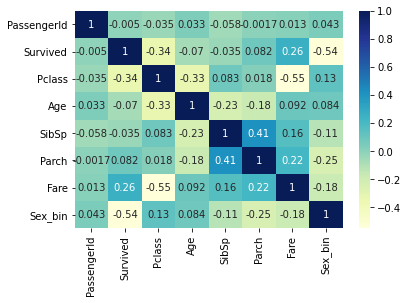

In [15]:
corr_matrix = data.corr()

sns.heatmap(corr_matrix, annot=True, cmap = "YlGnBu")
plt.show()

Como pudemos analisar, a variável 'Age' possui uma correlação maior que a variável Pclass, portanto trocaremos as duas. Temos como as nossas principais variáveis 'Parch', 'Age' e 'Sex_bin', por possuírem maior correlação.

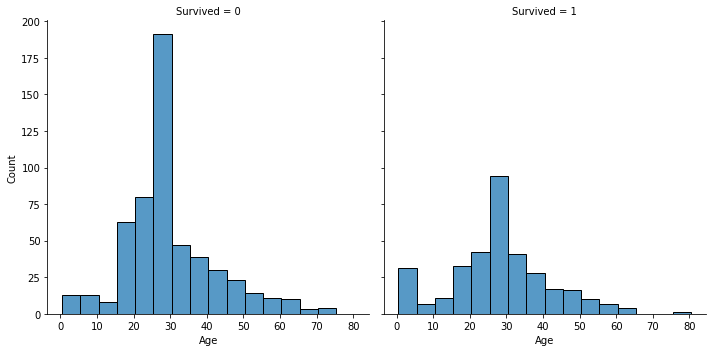

In [16]:
#Avaliando a quantidade de sobreviventes por idade
sns.displot(
    data, x="Age", col="Survived",
    binwidth=5, height=5, facet_kws=dict(margin_titles=True),
)
plt.show()

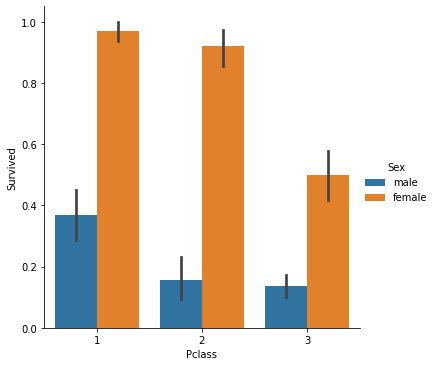

In [55]:
#Avaliando a quantidade de sobreviventes por classe
ax = sns.catplot(x="Pclass", y="Survived", hue="Sex", kind="bar", data=data)

In [63]:
df_pclass_survived = data.filter(items = ['Survived','Pclass']).where(data.Survived == 1).groupby('Pclass').count()
df_pclass_not_survived = data.filter(items = ['Survived','Pclass']).where(data.Survived == 0).groupby('Pclass').count()

df_pclass_not_survived

,Survived
Pclass,
1.0,80
2.0,97
3.0,372
